<a href="https://colab.research.google.com/github/ika-si/ML/blob/main/math_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pythonで主成分分析を実装する

## 3.主成分分析実装編

### 3-0. Google Colab のファイルを手元にコピーする
- この文を読めている時点でアクセスには成功している。
- 自身のGoogleドライブ上の好きな場所にこのファイルのコピーを作成しよう。
- 自身のローカルで実行していっても良いが、基本的にはGoogle Colabで進めることを想定している。

### 3-1. 自分自身で主成分分析を実装してみよう

- **下のコードを完成させて、主成分分析が実行されるようにしてみよう。**
  - コードが走ればよいので、それぞれに何が入るかを報告するのではなく、挙動した結果として下の様な散布図が得られたことを確認すればよい。
  - **先ほどのscikit-learnによる実装と同じ結果が得られたら終わり！すばらしい！**
    - 車輪の再発明ではあるが、原理が分かっていて、さらにその原理は割とシンプルなコードで書けることも分かっている意義は大きい。
    - うまく行った場合でも、縦方向の成分がsklearnの場合と上下反転していることに気づくかもしれない。
      - 縦の座標の正負を反転させると完全一致することが分かる。
      - 実際最適化自体はうまくできているので、sklearnと同一の実装とみなしてよい。
    - 分からない場合のために下にヒントを付けてある。必要に応じて参照しよう。
  - **実行結果として、得られた散布図が同じになったらTAに見せること（誰か1名でよい）。終わったら解散してよいが、時間が余ったら以下の4.加点課題：判別分析に取り組んでも良い。**

In [6]:
# 自分自身で主成分分析を実装して使ってみよう

import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import sklearn.datasets

# あやめデータセットを読み込んでいる
iris = sklearn.datasets.load_iris()

# 主成分分析を実行するクラス
class myPCA:

    # コンストラクタ（クラスを初期化する） 
    def __init__(self, n_components=2):

        # 主成分空間の次元数（何次元空間に圧縮したいか）
        self.n_components = n_components

    # 主成分分析の学習
    def fit(self, X):

        # 中心化（特徴量の平均を0にする処理）
        # まずは平均ベクトルを求める
        self.mean_X = np.average.mean(X, axis=0)
        # 全データから平均ベクトルを引く（ブロードキャスト処理）
        centered_X = X - self.mean_X.reshape()

        # xの分散共分散行列を求める
        S_x = np.matmul(centered_X.T, centered_X) 
        # ←  centered_X と centered_X の転置 の掛け算だが順序に注意
        #                                 特にpythonは行列が全て転置されている点に注意！！

        # 主成分分析＝分散共分散行列の固有値問題を解く
        eigen_values, eigen_vectors = np.linalg.eigvals(S_x)
        # eigen_value が大きい順にソート
        idx = eigen_values.argsort()[::-1]   
        # ソートした結果に基づいて固有ベクトルを並び替える
        self.eigen_vectors = eigen_vectors[:,idx]
 
    # 主成分分析の学習結果の適用
    def transform(self, Xt):

        # 中心化（特徴量の平均を0にする処理）
        # 引数のデータからfit関数で得た平均ベクトルを引く（ブロードキャスト処理）
        centered_Xt = Xt - self.mean_X.reshape()

        # 主成分分析の学習で得た固有ベクトルをself.n_components分だけ用いて射影
        return np.matmul(self.n_components) 
        # ← centered_Xt と self.eigen_vectors[:,0:self.n_components] を掛け算すればよいが順序に注意

# 自分自身による実装を使ってみよう

# 実装したmyPCAのインスタンスを作成
# 2次元空間に射影するインスタンスとする
mypca = myPCA(n_components=2)

# あやめデータをつかって主成分分析を学習
mypca.fit(iris.data)

# 学習した結果を使ってあやめデータを2次元空間に射影
my_pc_data = mypca.transform(iris.data)

# 2次元の主成分空間上でのあやめデータの分布をチェック
# 色付けはあやめデータの各品種である iris.target を使用
plt.scatter(my_pc_data[:, 0], my_pc_data[:, 1], c=iris.target)

AttributeError: ignored

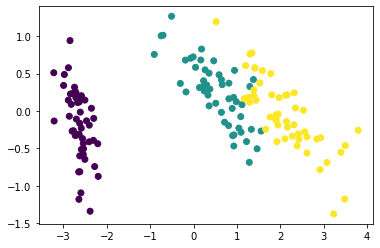

### 3-2. ヒント集

- 主成分分析のまとめ

  - 先ほどもまとめたが、特徴量ベクトル$\boldsymbol{x}$の主成分分析を行う際は、以下の手順を踏めばよかった。

    1.   特徴量の分散共分散行列$S_x = \frac{1}{n}\sum^{n}_{i=1}  \boldsymbol{x}_i \boldsymbol{x}_i^\top$を求める
    2.   この行列$S_x$の固有ベクトルを求める

  - 詳細は省くが、この時の固有値$\lambda$が、固有ベクトルによって射影した後の$\boldsymbol{w}^\top \boldsymbol{x}$の分散になっている。つまり、**$c$次元の空間で分散が最大になるような空間（主成分空間）を得るためには、固有値が大きい順に対応する$c$個の固有ベクトルを求めれば良い**。

- 「　①　」
  - numpyで平均ベクトルを求める関数を呼ぶ。webでnumpyのドキュメントを調べてみよう。
- 「　②　」
  - 行列X（各行に各特徴量ベクトルが入っている）から平均ベクトルを引けばよい。
    - 例えば数学として$X - \bar{\boldsymbol{x}}$と書いたら怒られる。左は行列、右はベクトルであって、行列からベクトルを引き算するというのは数学的には定義されていない。
    - しかしながらnumpyにはブロードキャストという便利な機能があって…？
- 「　③　」
  - $S_x = \frac{1}{n}\sum^{n}_{i=1}  \boldsymbol{x}_i \boldsymbol{x}_i^\top$の固有ベクトルを求めたい。
  - 固有ベクトルだけであれば、$S_x$の定数倍の行列である$\sum^{n}_{i=1}  \boldsymbol{x}_i \boldsymbol{x}_i^\top$も同じ固有ベクトルを持つ。（線形代数の基本）
  - そしてこの$\sum^{n}_{i=1}  \boldsymbol{x}_i \boldsymbol{x}_i^\top$はじつはある行列とその転置の積で表現できる。
  - pythonとnumpyでは行列が転置されていることに注意しよう。行列$A$と$B$で$C=AB$という行列$C$を得たいときは、np.matmulでは$C^\top = \mathrm{np.matmul}(B^\top, A^\top)$という呼び方をする必要がある。
- 「　④　」
  - S_xの固有ベクトルを求めたい。実はnumpyにそういう関数がある。webでnumpyのドキュメントを調べてみよう。
- 「　⑤　」
  - ほぼ「　②　」とおなじ。
- 「　⑥　」
  - 中心化されたXtとself.eigen_vectorsの一部を掛け算すればよい。
  - pythonとnumpyでは行列が転置されていることに注意しよう。
  - self.eigen_vectorsは既に転置済みで、$W^\top$という形になっている。
    - そして上から順に分散が大きい成分への射影ベクトルが並んでいる。
    - つまり上からself.n_componentsと同じ行数だけを参照すればよい。

# 4. 加点課題：判別分析
**加点課題：判別分析とは何かを以下のフォーマットに従って説明せよ。**
  - 1:主成分分析が分散を最大化する射影を求めているのに対し、判別分析では何を最大化する射影を求めているのか。
  - 2:判別分析でも一般化固有値問題を解くことになるが、その式はどのようなものか。
  - 上記は言葉による説明のみでも良いが、変数を定義しながら数式で書いた方が簡単であればそのようにしてもかまわない。
  - この課題の解答は ushiku@gm.tsuda.ac.jp 宛に「数式演習 加点課題：（氏名）」というタイトルで送付すること。
  - 基準以上の解答が出来た者には出席点0.5回分を加点する。
